<a href="https://colab.research.google.com/github/Lenoliums/Tasks-4-semester/blob/main/python/Anime/Anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from itertools import cycle
import numpy as np
import pandas as pd
from datetime import date
import re
import matplotlib.pyplot as plt

In [2]:
yearRe =  '([\d\?]{4})' # года
def getYear(x):
    if(pd.notna(x)): # если значение - не nan
        # ищем подстроку года (4 цыфры, возможны '?')
        match = re.search(yearRe, x) 
        if(match):
          year = match.groups()[0]
           # если нашли и в году нет вопросов, возвращаем год
          return int(year) if not '?' in year else np.nan
        else:
            return np.nan
    else:
      # иначе NaN
        return np.nan

def getTagCounts(column: pd.Series):
    tags = set([])
    # получение уникальных тегов
    for aniTags in column.values.tolist(): # для каждого аниме из колонки
      for tag in aniTags.split(','):  # для каждого тега
        tags.add(tag) # добавляем его в множество
    tags = list(tags) # переводим в список

    return pd.Series({
        tag:  column[ column.str.contains(tag) ].count() for tag in sorted(tags)
    }) # для каждого тега выбирем все аниме, у которых он есть и считаем их кол-во


out = open('/content/output.txt', 'w' , encoding="iso-8859-1")
out.close()
def openOut(mode='a'): # режимы: дописывание('a'), перезапись('w')
  global out
  out=open('/content/output.txt', mode , encoding="iso-8859-1")

def closeOut():
  global out
  out.close()


# информация о колонках
infoOut = '''
Title: str(unicue)
Prod.: str(category nominal)
Episodes: int(discrete)
Source: str(cathegorical nominal)
Genre: str(cathegorical nominal)
Airdate: str(discrete)
Rating: float(continous)
Voters: int(discrete)
Theme: tuple(nominals)
'''

# информация о данных в колонках
infoMissing = '''
Title: no missing
Production: missing values, replaced by "-",
Episodes: missing values, replaced by NaN, not counted
Source: missing values, replaced by "-"
Genre: no missing values
Airdate: missing values, ???? replaced by NaN
Rating: missing values, saved as NaN, not counted in grades
Voters: no missing values 
Theme: missing values, replaced by "-"
'''

In [3]:
headersSM = ["Title","Production","Episodes","Source","Genre","Airdate","Rating","Voters","Theme"]
anime = pd.read_csv('/content/anime.csv', names=headersSM, sep=',', encoding='ISO-8859-1')[1:]


In [4]:
#4
anime.columns = [x.lower() for x in headersSM]

In [5]:
anime["episodes"] = anime["episodes"].map(lambda x: int(x) if x != '?' and pd.notna(x) else np.nan )
anime["rating"] = anime["rating"].map(lambda x: float(x))
anime["voters"] = anime["voters"].map(lambda x: int(x.replace(',','')))
anime["theme"] = anime["theme"].map(lambda x: x if pd.notna(x) else '-')
anime["genre"] = anime["genre"].map(lambda x: x if pd.notna(x) else '-')

In [6]:
# 2
openOut()

out.write(anime.head(10).to_string()) # вывод первых дести
out.write('\n')

closeOut()

In [ ]:
# 3
openOut()

out.write(infoOut)
out.write('\n')

closeOut()

1

In [ ]:
# 5
openOut()

for column in ['Episodes', 'Rating', 'Voters']: # для каждой числовой колонки
  out.write(f"\t{column}\n") # название
  out.write(
      anime[ column.lower() ].describe()[1:].map(lambda x: int(x) if x.is_integer() else round(x, 4)).to_string()) # описание: mean, std, min, 25%, 50%, 75%, max
  
  out.write('\n\n')

closeOut()

In [ ]:
# 6
openOut()

themesTagsCount = getTagCounts( anime['theme']) # подсчет количества аниме по теме (много тегов у 1 записи, поэтому функция)
genresTagsCount = getTagCounts( anime['genre']) # подсчет количества аниме по жанру (много тегов у 1 записи, поэтому функция)
out.write('\tGenre\n')
out.write( genresTagsCount.to_string() ) # вывод количества аниме по жанру
out.write('\n\n\tTheme\n')
out.write( themesTagsCount.to_string() ) # вывод количества аниме по теме
out.write('\n\n\tProduction\n')
out.write( anime["production"].value_counts().to_string() ) # вывод количества аниме по компании
out.write('\n\n\tSource\n')
out.write( anime["source"].value_counts().to_string() ) # вывод количества аниме по источнику
out.write('\n')

closeOut()

1

In [ ]:
# 7
openOut()

out.write(infoMissing)
out.write('\n')

closeOut()

1

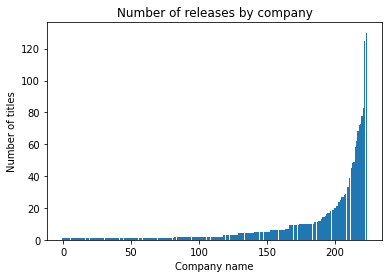

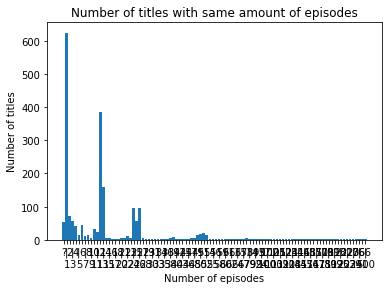

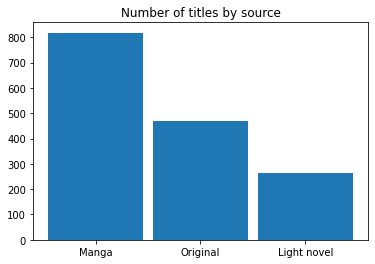

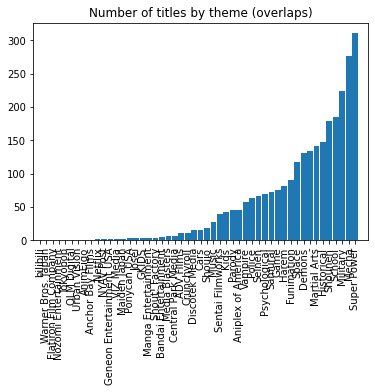

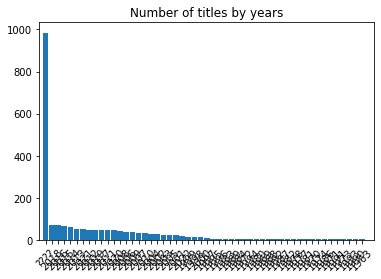

28

In [ ]:
openOut()

# 8
    #   8.a
prodToNum = anime["production"].value_counts().sort_values(ascending=True) # массив количесво аниме для каждой уникальной компании
keysPN = prodToNum.keys() # названия компаний
valsPN = prodToNum.values # кол-во аниме
# график
plt.title('Number of releases by company')
plt.bar( range(len(keysPN)), valsPN, width=0.9 )
plt.xlabel("Company name")
plt.ylabel("Number of titles")
plt.show()
out.write(f'Most releases: "{keysPN[-1]}" with {valsPN[-1]} title\n')
out.write(f'Least releases: "{keysPN[0]}" with {valsPN[0]} title\n')

   #   8.b
# не учитываем аниме без информации о эпизодах
# группируем строки по количеству эпизодов
# для каждой группы сохраняем количество
titleToEpisodes = anime[['title', 'episodes']].dropna().groupby(['episodes']).count() 
keysTE = titleToEpisodes.index.to_list() # количества эпизодов - ключи
valsTE = titleToEpisodes['title'].tolist() # количества аниме - значения
# график
plt.bar( range(len(keysTE)), valsTE, align='center', width=0.9)
spaces = cycle(['', '|\n'])
plt.xticks(range(len(keysTE)), [f'{next(spaces)}{label}' for label in keysTE])
plt.xlabel("Number of episodes")
plt.ylabel("Number of titles")
plt.title('Number of titles with same amount of episodes')
plt.show()
out.write(f'Most common number of episodes: {titleToEpisodes.idxmax().values[0]}\n')

   #   8.c
# группируем строки по source
# для каждого source считаем количество
# сортируем количества по убыванию
# берём 3 самых популярных
sourceToPopular = anime[['source', 'title']].groupby(['source']).count().sort_values(by=['title'], ascending=False)[:3]
keysSP = sourceToPopular.index.to_list() # источники - ключи
valsSP = sourceToPopular['title'].tolist() # количества - значения
# график
plt.bar( range(3), valsSP, width=0.9 )
plt.title('Number of titles by source')
plt.xticks(range(3), keysSP)
plt.show()
out.write(f'Most popular source: "{keysSP[0]}"\n')

    #   8.d
# количества аниме по теме уже посчитаны в задании 6
# сортируем по количеству
popularThemes = themesTagsCount.sort_values()
keysPT = popularThemes.index.to_list() # темы - ключи
valsPT = popularThemes.values.tolist() # количества - значения
# график
plt.bar( range(len(keysPT)), valsPT, align='center', width=0.9)
plt.title('Number of titles by theme (overlaps)')
spaces = cycle(['', '\n', '\n\n', '\n\n\n'])
plt.xlim([-1, len(keysPT) +1])
plt.xticks(range(len(keysPT)), keysPT, rotation=90)
plt.show()
out.write(f'Most popular theme: "{keysSP[-1]}"\n')

    #   8.e
# получаем столбец с годами выхода аниме
# отбрасываем некорректные даты
tempSlice = anime['airdate'].map(lambda x: getYear(x)).dropna()
titlesToYear = tempSlice.value_counts() # для каждого года считаем его количество
keysTY = titlesToYear.index.to_list() # годы - ключи
valsTY = titlesToYear.values.tolist() # количества - значения
# график
plt.bar( range(len(keysTY)), valsTY, align='center', width=0.9)
plt.title('Number of titles by years')
plt.xlim([-1, len(keysTY) +1])
plt.xticks(range(len(keysTY)), keysTY, rotation=45)
plt.show()
out.write(f'Most releasive year: "{keysTY[0]}"\n')

closeOut()

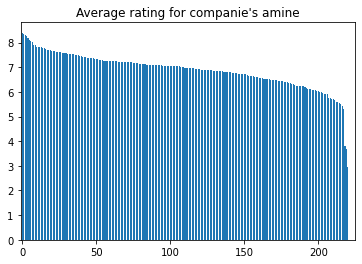

91

In [ ]:
openOut()

#9
# группируем рейтинги по компании
# считаем среднее от рейтинга
# сортируем по убыванию среднего рейтинга
rMeans = anime[['production', 'rating']].groupby(['production'])['rating'].mean().sort_values(ascending=False)
keysRM = rMeans.index.to_list() # ключи -  название компании
valsRM = rMeans.values.tolist() # значения - средний рейтинг
# график
plt.bar( range(len(keysRM)), valsRM, align='center', width=0.7)
plt.title('Average rating for companie\'s amine')
plt.xticks(range(len(keysRM)), keysRM, rotation=90)
plt.xlim([-1, len(valsRM) +1])
plt.show()
out.write(f'''Most popular anime companies: { ', '.join( ['"%s"' % comp for comp in keysRM[:3]] ) } \n''')

closeOut()

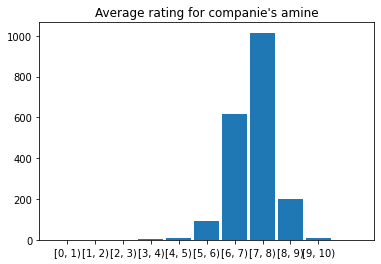

29

In [ ]:
openOut()

# 10
# массив маска пренадлежности интервалам [0, 1), [1, 2), ..., [9:10) столбца rating
inters = pd.cut( anime["rating"], np.arange(0, 11, 1), right=False)
# группировка по интервалам и подсчёт значений
rIntervals = anime['rating'].groupby( inters ).count()
keysRI = rIntervals.index.to_list() # ключи - интервалы
valsRI = rIntervals.values.tolist() # значения - количества аниме с таким рейтингом
# график
plt.bar( range(len(keysRI)), valsRI, align='center', width=0.9)
plt.title('Average rating for companie\'s amine')
plt.xticks(range(len(keysRI)), keysRI )
plt.xlim([-1, len(valsRI) +1])
plt.show()

out.write(f'Most often ratings: { rIntervals.idxmax() } \n\n')

closeOut()


In [ ]:
openOut()

#11
slice = anime[["rating", "genre", 'theme']].dropna(axis=0)

# жанры и теги найдены в задании 6
genres = genresTagsCount.index.to_list()
themes = themesTagsCount.index.to_list()

# data словарь {жанр: [ 'тема: рейтинг', ... ] }
data = {} 
for genre in genres: # для каждого жанра
  genSlice = slice.loc[ slice['genre'].str.contains(genre) ] # выбираем аниме с такии жанром

  themeRatings = pd.Series({
    theme: genSlice.loc[ genSlice['theme'].str.contains(theme) ]['rating'].mean() # находим среднюю оценку по теме
    for theme in themes # для каждой темы
  }).sort_values(ascending=False) # сортируем по убыванию

  # первые 3
  t = themeRatings[:3].index.tolist()
  r = themeRatings[:3].values.tolist()
  # записываем в data
  data[genre] = [
    f'{t[0]} : {r[0]:.2f}',
    f'{t[1]} : {r[1]:.2f}',
    f'{t[2]} : {r[2]:.2f}'
  ]
  
df = pd.DataFrame(data)
out.write('\t3 most popular anime themes for each genre\n')
out.write(df.to_string())

closeOut()

13419

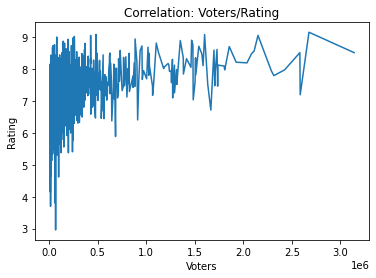

In [ ]:
#12
plt.plot(anime['voters'], anime['rating'])
plt.title('Correlation: Voters/Rating')
plt.xlabel('Voters')
plt.ylabel('Rating')

plt.show()

In [ ]:
out.close()